In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrc0188


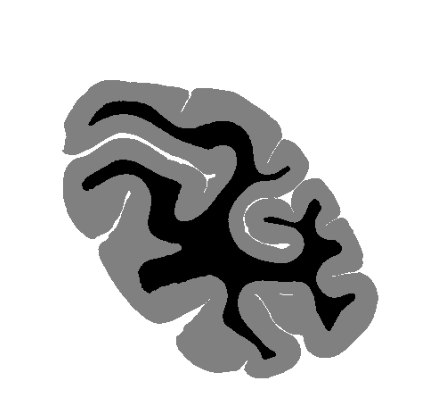

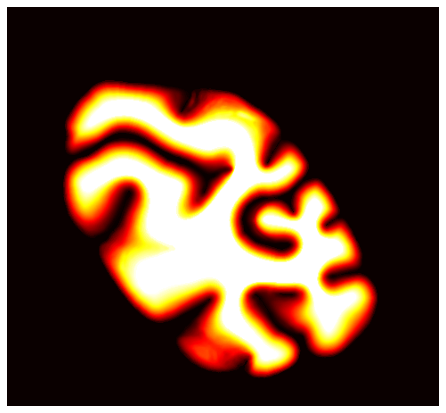

In [2]:
# Load quantity of interest and the cortex segmentation volume

target_file = "data/aa/volume/brain_visa/equivolumic_depth_6_fixed.nii.gz"
cortex_file = "data/aa/volume/cortex/cortex_6.h5"

###

from vervet1818_3d.correlation.functions import load_data
import pli.image as im

target_volume, target_spacing, cortex_volume, cortex_spacing = load_data(
    target_file,
    cortex_file
)

im.show(cortex_volume[:, 50, :])
im.show(target_volume[:, 50, :], cmap='hot')

100%|██████████| 117/117 [01:33<00:00,  1.25it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.793


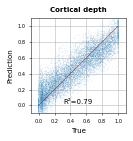

Train & Test:
R² test: -0.168


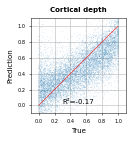

Test & Test:
Scale
Fit
R² tes testt: 0.796


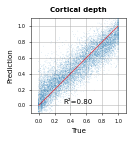

100%|██████████| 234/234 [00:03<00:00, 68.00it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.646


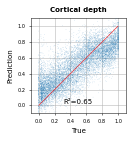

Train & Test:
R² test: 0.566


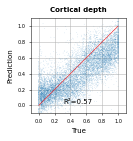

Test & Test:
Scale
Fit
R² tes testt: 0.67


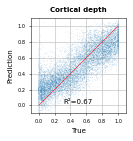

100%|██████████| 137/137 [00:29<00:00,  4.69it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.681


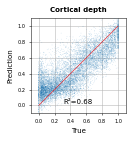

Train & Test:
R² test: -3.57e+06


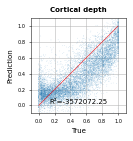

Test & Test:
Scale
Fit
R² tes testt: 0.662


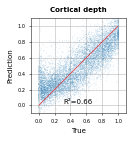

100%|██████████| 117/117 [00:23<00:00,  4.98it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.711


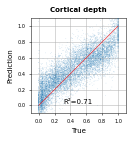

Train & Test:
R² test: 0.592


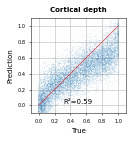

Test & Test:
Scale
Fit
R² tes testt: 0.706


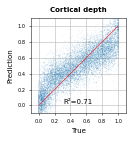

100%|██████████| 117/117 [00:22<00:00,  5.18it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.876


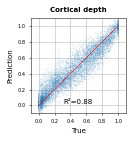

Train & Test:
R² test: 0.803


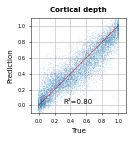

Test & Test:
Scale
Fit
R² tes testt: 0.855


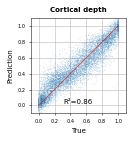

100%|██████████| 117/117 [00:22<00:00,  5.16it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.874


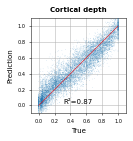

Train & Test:
R² test: 0.777


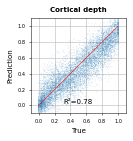

Test & Test:
Scale
Fit
R² tes testt: 0.856


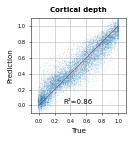

100%|██████████| 117/117 [00:27<00:00,  4.24it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.864


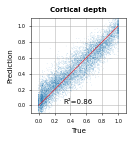

Train & Test:
R² test: 0.795


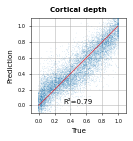

Test & Test:
Scale
Fit
R² tes testt: 0.851


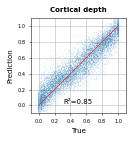

100%|██████████| 117/117 [00:23<00:00,  4.92it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.873


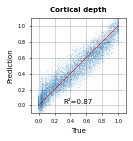

Train & Test:
R² test: 0.813


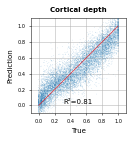

Test & Test:
Scale
Fit
R² tes testt: 0.863


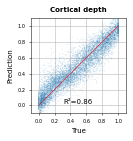

100%|██████████| 117/117 [00:23<00:00,  4.98it/s]


Aggregate train data
Aggregate test data
Scale
Fit
Train & Train:
R² train: 0.872


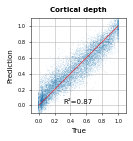

Train & Test:
R² test: 0.811


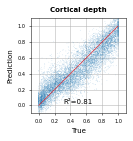

Test & Test:
Scale
Fit
R² tes testt: 0.861


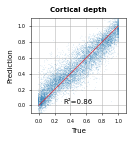

In [3]:
# Load feature maps and setup dictionary of section IDs as keys, starting at zero_section

title = "Cortical depth"
name = "cortical-depth"

# Define features
features_path = "data/aa/features/"

models = [
    "simclr-imagenet",
    "pli_glcm",
    "pli_sobel_histo",
    "resnet50_planes8_962-1083_same",
    "resnet50_planes8_962-1083_circle_small",
    "resnet50_planes8_962-1083_circle",
    "resnet50_planes8_962-1083_neighbor",
    "resnet50_planes8_962-1083_sphere_small",
    "resnet50_planes8_962-1083_sphere",
]

feature_groups = [
    "Features/2048",
    "Features/36",
    "Features/252",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
]

# Define Train/Test split
zero_section = 841
min_ix = 30
split_ix = 120
max_ix=  210

# Define training data
GM_CLASS = 2

train_count = 10_000
test_count = 10_000

seed = 299_792_458

# Visualization
target_range = (0., 1.)
vis_range = (-0.1, 1.1)

subsample = 10_000

###

from vervet1818_3d.correlation.functions import load_features, aggregate_data, linear_evaluation
import os
import matplotlib.pyplot as plt

# Set the global font size

results = {}

for model, feature_group in zip(models, feature_groups):

    feature_dir = os.path.join(features_path, model)

    feature_maps = load_features(
        feature_dir,
        feature_group,
        zero_section,
        cortex_volume
    )

    test_indices = sorted([f for f in feature_maps.keys() if min_ix <= f < split_ix])
    train_indices = sorted([f for f in feature_maps.keys() if max_ix > f >= split_ix])

    print("Aggregate train data")
    train_features, train_target = aggregate_data(train_indices, train_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)
    print("Aggregate test data")
    test_features, test_target = aggregate_data(test_indices, test_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)

    r = linear_evaluation(
        train_features,
        train_target,
        test_features,
        test_target,
        target_range,
        vis_range,
        name,
        model,
        title,
        subsample,
    )

    results[model] = r

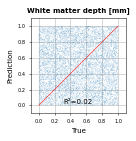

In [4]:
from vervet1818_3d.correlation.functions import plot_regression

import numpy as np

target = np.random.rand(10_000)
pred = np.random.rand(10_000)


plot_regression(target, pred, target_range=(0, 1), vis_range=(-0.1, 1.1), r_sq=0.02, title="White matter depth [mm]", file=f"doc/correlation/test.pdf")

In [5]:

print("| Method | Train/Train R2\t| Train/Test R2\t| Test/Test R2\t|")
print("| --- | --- | --- | --- |")

for k in results.keys():
    print(f"| {k}\t | {results[k]['train_train_r2']:.3g}\t| {results[k]['train_test_r2']:.3g} | {results[k]['test_test_r2']:.3g} |")

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.793	| -0.168 | 0.796 |
| pli_glcm	 | 0.646	| 0.566 | 0.67 |
| pli_sobel_histo	 | 0.681	| -3.57e+06 | 0.662 |
| resnet50_planes8_962-1083_same	 | 0.711	| 0.592 | 0.706 |
| resnet50_planes8_962-1083_circle_small	 | 0.876	| 0.803 | 0.855 |
| resnet50_planes8_962-1083_circle	 | 0.874	| 0.777 | 0.856 |
| resnet50_planes8_962-1083_neighbor	 | 0.864	| 0.795 | 0.851 |
| resnet50_planes8_962-1083_sphere_small	 | 0.873	| 0.813 | 0.863 |
| resnet50_planes8_962-1083_sphere	 | 0.872	| 0.811 | 0.861 |


With clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.8	| 0.449 | 0.8 |
| pli_glcm	 | 0.648	| 0.572 | 0.674 |
| pli_sobel_histo	 | 0.683	| 0.525 | 0.67 |
| resnet50_planes8_962-1083_same	 | 0.72	| 0.607 | 0.714 |
| resnet50_planes8_962-1083_circle_small	 | 0.878	| 0.805 | 0.857 |
| resnet50_planes8_962-1083_circle	 | 0.877	| 0.785 | 0.858 |
| resnet50_planes8_962-1083_neighbor	 | 0.868	| 0.805 | 0.854 |
| resnet50_planes8_962-1083_sphere_small	 | 0.876	| 0.817 | 0.865 |
| resnet50_planes8_962-1083_sphere	 | 0.875	| 0.814 | 0.863 |


Without clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.793	| -0.168 | 0.796 |
| pli_glcm	 | 0.646	| 0.566 | 0.67 |
| pli_sobel_histo	 | 0.681	| -3.57e+06 | 0.662 |
| resnet50_planes8_962-1083_same	 | 0.711	| 0.592 | 0.706 |
| resnet50_planes8_962-1083_circle_small	 | 0.876	| 0.803 | 0.855 |
| resnet50_planes8_962-1083_circle	 | 0.874	| 0.777 | 0.856 |
| resnet50_planes8_962-1083_neighbor	 | 0.864	| 0.795 | 0.851 |
| resnet50_planes8_962-1083_sphere_small	 | 0.873	| 0.813 | 0.863 |
| resnet50_planes8_962-1083_sphere	 | 0.872	| 0.811 | 0.861 |
